In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import csv


In [3]:
header_rows = 317
chip_comb_data = pd.read_csv('data/24.12会议/2023.11.29Comb/下午/A0005.CSV', skiprows=header_rows, nrows=None)
eocomb_data = pd.read_csv('data/24.12会议/2023.11.29Comb/下午/A0007电梳.CSV', skiprows=header_rows, nrows=None)

C:\Users\kichi\AppData\Local\Temp\ipykernel_19088\3020959871.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_chip[power_chip < min_power] = min_power
C:\Users\kichi\AppData\Local\Temp\ipykernel_19088\3020959871.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peak_wavelengths_chip, peak_powers_chip, 'ro', color='#902d4aff')
C:\Users\kichi\AppData\Local\Temp\ipykernel_19088\3020959871.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peak_wavelengths_eocomb, peak_powers_eocomb, 'ro', color='#00adb5ff')


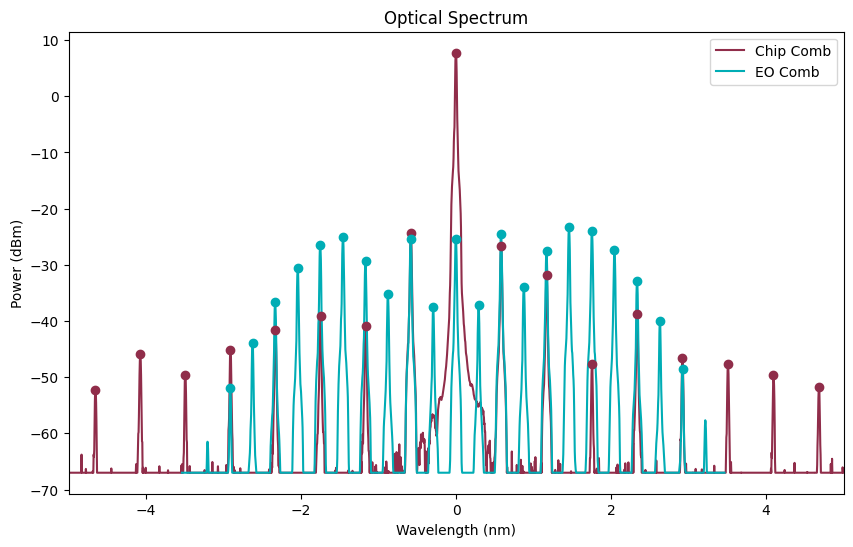

In [4]:
# 提取波长和光功率数据
wavelength_chip = chip_comb_data['Tr A(WL)']
power_chip = chip_comb_data['Tr A(LEVEL)[LOG]']
wavelength_eocomb = eocomb_data['Tr A(WL)']
power_eocomb = eocomb_data['Tr A(LEVEL)[LOG]'] - 18

# 将小于min_power的光功率值设置为min_power
min_power = -67
power_chip[power_chip < min_power] = min_power
power_eocomb[power_eocomb < min_power] = min_power

# 以最高光功率的波长为中心，将波长数据转换为相对波长
max_power_index = np.argmax(power_chip)
max_power_wavelength = wavelength_chip[max_power_index]
wavelength_chip = wavelength_chip - max_power_wavelength
wavelength_eocomb = wavelength_eocomb - max_power_wavelength

# 寻峰
from scipy.signal import find_peaks
peaks_chip, _ = find_peaks(power_chip, prominence=5, distance=10, width=0, height=-55)
peaks_eocomb, _ = find_peaks(power_eocomb, prominence=5, distance=10, width=0, height=-55)
peak_wavelengths_chip = wavelength_chip[peaks_chip]
peak_powers_chip = power_chip[peaks_chip]
peak_wavelengths_eocomb = wavelength_eocomb[peaks_eocomb]
peak_powers_eocomb = power_eocomb[peaks_eocomb]


# 绘制光谱图
plt.figure(figsize=(10, 6))
# 绘制曲线
plt.plot(wavelength_chip, power_chip, color='#902d4aff', linestyle='-', label='Chip Comb')
plt.plot(wavelength_eocomb, power_eocomb, color='#00adb5ff', linestyle='-', label='EO Comb')
# 绘制峰值
plt.plot(peak_wavelengths_chip, peak_powers_chip, 'ro', color='#902d4aff')
plt.plot(peak_wavelengths_eocomb, peak_powers_eocomb, 'ro', color='#00adb5ff')
# 设置坐标轴范围、标签、标题、图例、网格等
plt.xlim(-5, 5) # 设置x轴范围
# plt.ylim(-70, 0) # 设置y轴范围
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.title('Optical Spectrum')
plt.title('Optical Spectrum')
plt.legend()
# plt.grid(True)
# 导出为矢量图格式（SVG 或 PDF），确保高质量
plt.savefig('data/24.12会议/2023.11.29Comb/实际光谱.svg', format='svg', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()



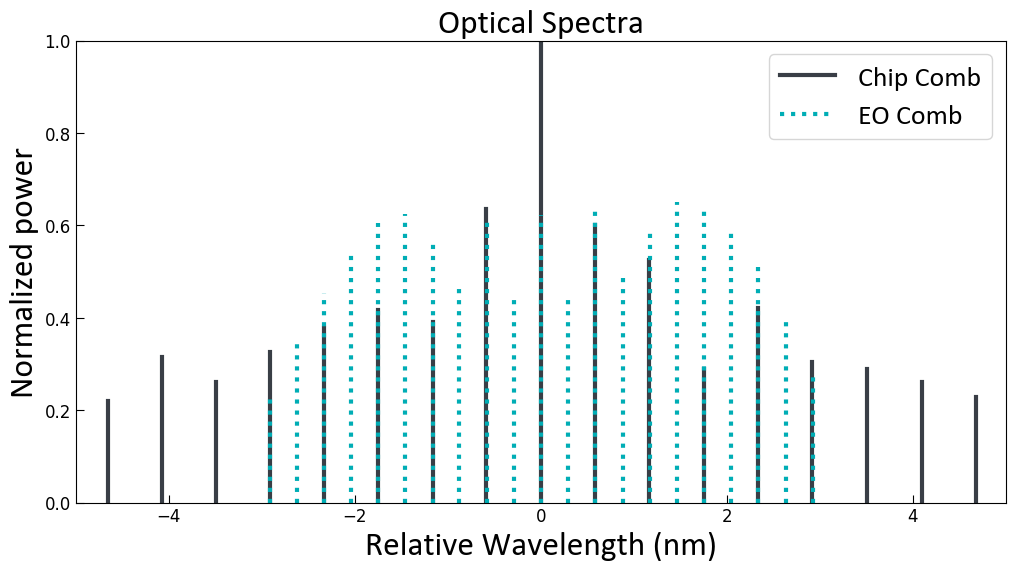

In [5]:
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

# 绘制光谱示意图，每个峰都抽象成无限细的宽度
plt.figure(figsize=(12, 6))

# 绘制芯片梳峰值
for peak_wavelength, peak_power in zip(peak_wavelengths_chip, peak_powers_chip):
    plt.axvline(x=peak_wavelength, color='#393e46ff', linestyle='-', linewidth=3, ymax=(peak_power - min_power) / (0 - min_power))
# 绘制电梳峰值
for peak_wavelength, peak_power in zip(peak_wavelengths_eocomb, peak_powers_eocomb):
    plt.axvline(x=peak_wavelength+0.004, color='#00adb5ff', linestyle=':', linewidth=3, ymax=(peak_power - min_power) / (0 - min_power))


# 设置坐标轴范围、标签、标题、图例、网格等
plt.xlim(-5, 5)  # 设置x轴范围
plt.ylim(0, 1)  # 设置y轴范围

# 设置字体和字体大小
title_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
label_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
tick_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 20}
# 设置图例字体
legend_font = FontProperties(family='calibri', weight='normal', size=20)


# 设置标题、坐标轴标签和刻度字体
plt.title('Sample Plot with Custom Fonts', fontdict=title_font)
plt.xlabel('X Axis', fontdict=label_font)
plt.ylabel('Y Axis', fontdict=label_font)

# 设置刻度字体
plt.tick_params(axis='both', labelsize=12)  # 刻度字体大小

# 设置刻度线向内
plt.tick_params(axis='both', direction='in', length=6)  # 轴 'both' 表示x轴和y轴都应用此设置，direction='in' 表示刻度线向内，length=6 设置刻度线长度

# 手动创建图例项
legend_elements = [
    Line2D([0], [0], color='#393e46ff', lw=3, linestyle='-', label='Chip Comb'),
    Line2D([0], [0], color='#00adb5ff', lw=3, linestyle=':', label='EO Comb')
]
# 添加图例，并设置颜色和线段样式
plt.legend(handles=legend_elements, loc='upper right', prop=legend_font)
plt.xlabel('Relative Wavelength (nm)', fontdict=label_font)
plt.ylabel('Normalized power', fontdict=label_font)
plt.title('Optical Spectra', fontdict=title_font)
plt.savefig('data/24.12会议/2023.11.29Comb/抽象光谱.svg', format='svg', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()

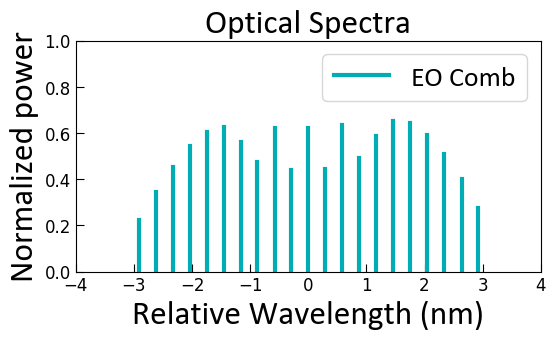

In [10]:
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

# 绘制光谱示意图，每个峰都抽象成无限细的宽度
plt.figure(figsize=(6, 3))

# 绘制芯片梳峰值
# for peak_wavelength, peak_power in zip(peak_wavelengths_chip, peak_powers_chip):
#     plt.axvline(x=peak_wavelength, color='#393e46ff', linestyle='-', linewidth=3, ymax=(peak_power - min_power) / (0 - min_power))
# 绘制电梳峰值
for peak_wavelength, peak_power in zip(peak_wavelengths_eocomb, peak_powers_eocomb):
    plt.axvline(x=peak_wavelength+0.004, color='#00adb5ff', linestyle='-', linewidth=3, ymax=(peak_power - min_power) / (0 - min_power))


# 设置坐标轴范围、标签、标题、图例、网格等
plt.xlim(-4, 4)  # 设置x轴范围
plt.ylim(0, 1)  # 设置y轴范围

# 设置字体和字体大小
title_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
label_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
tick_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 20}
# 设置图例字体
legend_font = FontProperties(family='calibri', weight='normal', size=20)


# 设置标题、坐标轴标签和刻度字体
plt.title('Sample Plot with Custom Fonts', fontdict=title_font)
plt.xlabel('X Axis', fontdict=label_font)
plt.ylabel('Y Axis', fontdict=label_font)

# 设置刻度字体
plt.tick_params(axis='both', labelsize=12)  # 刻度字体大小

# 设置刻度线向内
plt.tick_params(axis='both', direction='in', length=6)  # 轴 'both' 表示x轴和y轴都应用此设置，direction='in' 表示刻度线向内，length=6 设置刻度线长度

# 手动创建图例项
legend_elements = [
    # Line2D([0], [0], color='#393e46ff', lw=3, linestyle='-', label='Chip Comb'),
    Line2D([0], [0], color='#00adb5ff', lw=3, linestyle='-', label='EO Comb')
]
# 添加图例，并设置颜色和线段样式
plt.legend(handles=legend_elements, loc='upper right', prop=legend_font)
plt.xlabel('Relative Wavelength (nm)', fontdict=label_font)
plt.ylabel('Normalized power', fontdict=label_font)
plt.title('Optical Spectra', fontdict=title_font)
plt.savefig('data/24.12会议/2023.11.29Comb/抽象光谱只有eocomb.png', format='png', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()